# Introduction

Customer support is key to any business. Understanding how your team performs and finding ways to improve is what this  project is all about.

We're using data from a call center to see how the support team is performing. The data tells us who answered the call, when it was, what it was about, if it was answered and resolved, how quickly it was answered, how long it lasted, and the customer's satisfaction rating.

We want to find out if there are any issues causing low satisfaction ratings. By looking closely at these calls, we can figure out what they have in common and suggest improvements.

We're also going to use the insights we gather to build a dashboard. This tool will help us track the performance of the support center team in real time, making it easier to spot issues and make changes quickly.

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Downloading data

In [2]:
path = '/Users/misharimer/Downloads/Data Jam/'
df_tickets = pd.read_excel(path + 'Call-Center-Dataset.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

# Data Preprocessing & Observation

The dataset stores information about customer calls to a support center of Cellular company. From the documentation we already aware of the basics. The file `Call-Center-Dataset.xlsx` contains the following columns:
* Call ld - Call Id
* SupportPerson - Support Person Name
* Date - Date of the call to the support center
* Time - Time of the call to the support center
* Topic - Call Topic (Admin Support, Contract related, Payment related, Streaming, Technical Support)
* Answered - Answered (Y/N)
* Resolved - Resolved (Y/N)
* AnswerSpeed - Speed of answer in seconds Number of seconds customer waited till the call was answered
* TalkDuration - Duration of the call
* Satisfaction rating - Customer call satisfaction


In [4]:
df_tickets.head()

,Call Id,SupportPerson,Date,Time,Topic,Answered,Resolved,AnswerSpeed,TalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


In [5]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Call Id              5000 non-null   object 
 1   SupportPerson        5000 non-null   object 
 2   Date                 5000 non-null   object 
 3   Time                 5000 non-null   object 
 4   Topic                5000 non-null   object 
 5   Answered             5000 non-null   object 
 6   Resolved             5000 non-null   object 
 7   AnswerSpeed          4054 non-null   float64
 8   TalkDuration         4054 non-null   object 
 9   Satisfaction rating  4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [6]:
def custom_info(df):
    for col in df:
        print('column name:', col)
        print('data type:', df[col].dtype)
        print('number of values:', df[col].shape[0])
        print('number of unique values:', df[col].nunique())
        print('unique values:', df[col].unique())
        print('number of zero values:', len(df[df[col]==0]))
        print('number of missing values:', df[col].isna().sum())
        print('percentage of missing values:', round(df[col].isna().sum() / len(df) * 100, 2))
        
        if df[col].dtype in ['int64', 'float64']:
            print('mean:', df[col].mean())
            print('median:', df[col].median())
            print('mode:', df[col].mode().values)
            print('max:', df[col].max())
            print('min:', df[col].min())
        else:
            print('mode:', df[col].mode().values)
        
        print('--'*20)
        print()     

In [7]:
custom_info (df_tickets)

column name: Call Id
data type: object
number of values: 5000
number of unique values: 5000
unique values: ['ID0001' 'ID0002' 'ID0003' ... 'ID4998' 'ID4999' 'ID5000']
number of zero values: 0
number of missing values: 0
percentage of missing values: 0.0
mode: ['ID0001' 'ID0002' 'ID0003' ... 'ID4998' 'ID4999' 'ID5000']
----------------------------------------

column name: SupportPerson 
data type: object
number of values: 5000
number of unique values: 8
unique values: ['Diane' 'Becky' 'Stewart' 'Greg' 'Jim' 'Joe' 'Martha' 'Dan']
number of zero values: 0
number of missing values: 0
percentage of missing values: 0.0
mode: ['Jim']
----------------------------------------

column name: Date
data type: object
number of values: 5000
number of unique values: 90
unique values: ['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01

We have 5000 unique calls, each leaving a trace in our logs. Eight of our teammates answered these calls during the period from 01/11/2021 to 31/03/2021 (89 days). Now, let's transition to the preprocessing stage before we dive deeper into data exploration and commentary.

In [14]:
print('Number of duplicated rows in the dataframe:',df_tickets.duplicated().sum())
print('Share of duplicated rows in the dataframe:',round((df_tickets.duplicated().sum()/len(df_tickets))*100,2))

Number of duplicated rows in the dataframe: 0
Share of duplicated rows in the dataframe: 0.0


No duplicates has been found

Enhancing the comprehensibility of column titles



In [15]:
df_tickets.columns = df_tickets.columns.str.strip()
df_tickets.columns = df_tickets.columns.str.lower()
df_tickets = df_tickets.rename(columns={'call id': 'call_id', 'supportperson': 'support_person','answerspeed':'answer_speed','talkduration':'talk_duration','satisfaction rating':'satisfaction_rating'})

Converting object dtype to datetime

In [16]:
df_tickets['date'] = pd.to_datetime(df_tickets['date'])

Rounding exact time of call to hours

In [17]:
df_tickets['time_hour'] = pd.to_datetime(df_tickets['time'], format='%H:%M:%S').dt.round('H').dt.hour

Replacing 'Yes' and 'No' to boolean values

In [18]:
df_tickets['answered'] = df_tickets['answered'].replace({'Y': 1, 'N': 0})
df_tickets['resolved'] = df_tickets['resolved'].replace({'Y': 1, 'N': 0})

Converting talk duration to seconds

In [19]:
df_tickets['talk_duration_sec'] = df_tickets['talk_duration'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second if pd.notnull(x) else np.nan)

Checking if  unanswered calls are the reason for missing values we have in `answer_speed`, `talk_duration`, `satisfaction_rating` columns.

In [20]:
missing_values = df_tickets[(df_tickets['answer_speed'].isnull()) & (df_tickets['talk_duration'].isnull()) & (df_tickets['satisfaction_rating'].isnull())]
missing_values.head()

,call_id,support_person,date,time,topic,answered,resolved,answer_speed,talk_duration,satisfaction_rating,time_hour,talk_duration_sec
5,ID0006,Stewart,2021-01-01,10:00:29,Technical Support,0,0,NaN,NaN,NaN,10,NaN
10,ID0011,Joe,2021-01-01,11:15:22,Payment related,0,0,NaN,NaN,NaN,11,NaN
17,ID0018,Becky,2021-01-01,11:57:07,Admin Support,0,0,NaN,NaN,NaN,12,NaN
18,ID0019,Jim,2021-01-01,12:01:26,Streaming,0,0,NaN,NaN,NaN,12,NaN
22,ID0023,Martha,2021-01-01,12:02:53,Technical Support,0,0,NaN,NaN,NaN,12,NaN


In [21]:
len(missing_values)

946

In [22]:
missing_values['answered'].value_counts()

0    946
Name: answered, dtype: int64

This is 100% accurate: unanswered calls result in no statistics (speed, duration, satisfaction rating). Therefore there's no need to alter this or exclude these rows. Instead, let's investigate which support person has the highest number of unanswered calls. 

In [23]:
df_answered = df_tickets.groupby('support_person')['answered'].value_counts(normalize=True).reset_index(name='percentage')
df_answered

,support_person,answered,percentage
0,Becky,1,0.819334
1,Becky,0,0.180666
2,Dan,1,0.826224
3,Dan,0,0.173776
4,Diane,1,0.791469
5,Diane,0,0.208531
6,Greg,1,0.804487
7,Greg,0,0.195513
8,Jim,1,0.804805
9,Jim,0,0.195195


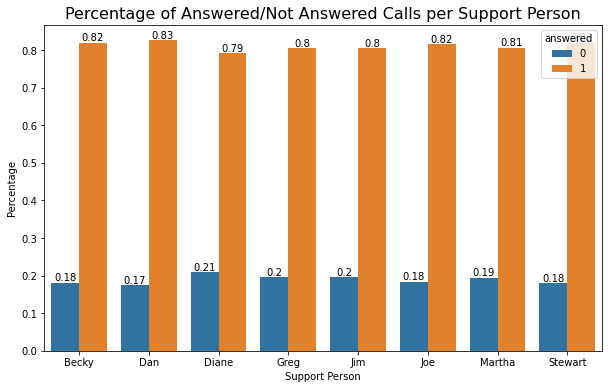

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='support_person', y='percentage', hue='answered', data=df_answered)
plt.title('Percentage of Answered/Not Answered Calls per Support Person',size=16)
plt.ylabel('Percentage')
plt.xlabel('Support Person')

for i in ax.containers:
    ax.bar_label(i, labels=[format(round(value, 2), ',') for value in i.datavalues])
    
plt.show()
    

Among our teammates, the proportion of unanswered calls is almost equal, with a range of 17-21%

In [25]:
df_tickets['answered'].value_counts(normalize=True).rename_axis('answer_status').reset_index(name='share')*100

,answer_status,share
0,100,81.08
1,0,18.92


Within the overall data, the proportion of unanswered calls is expectedly similar to the individual shares of unanswered calls for each teammate. Our first recommendation in this case is to investigate the reasons for not answering the calls and suggest implementing a way to log information on the duration of customer wait times before they give up trying to reach the customer center.

In [26]:
missed_calls_date = df_tickets.query('answered==0').groupby('date')['call_id'].count().reset_index(name="counts")
missed_calls_date.head()

,date,counts
0,2021-01-01,12
1,2021-01-02,12
2,2021-01-03,11
3,2021-01-04,10
4,2021-01-05,7


In [27]:
missed_calls_date['date'] = pd.to_datetime(missed_calls_date['date'])
missed_calls_date['date'] = missed_calls_date['date'].dt.strftime('%y-%m-%d')

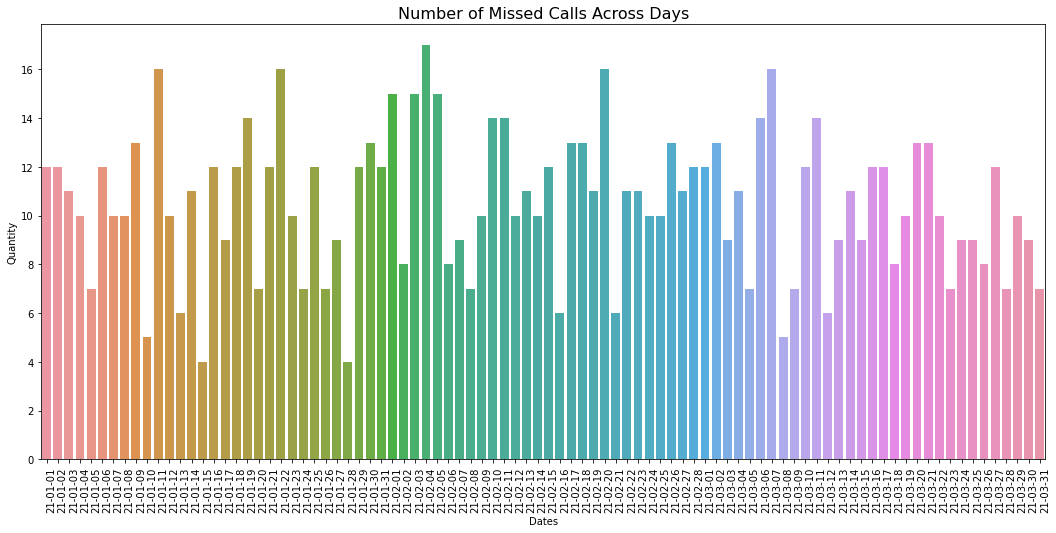

In [28]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='date', y='counts', data = missed_calls_date)
plt.title('Number of Missed Calls Across Days',size=16)
plt.ylabel('Quantity')
plt.xlabel('Dates')
plt.xticks(rotation=90,ha='left')   
plt.show()

There is no consistent pattern in the number of missed calls per day. The count fluctuates between 4 and 16 missed calls per day throughout the entire period.

In [29]:
missed_calls_hours = df_tickets.query('answered==0').groupby('time_hour')['call_id'].count().reset_index(name="counts")
missed_calls_hours.head()

,time_hour,counts
0,9,49
1,10,112
2,11,104
3,12,107
4,13,104


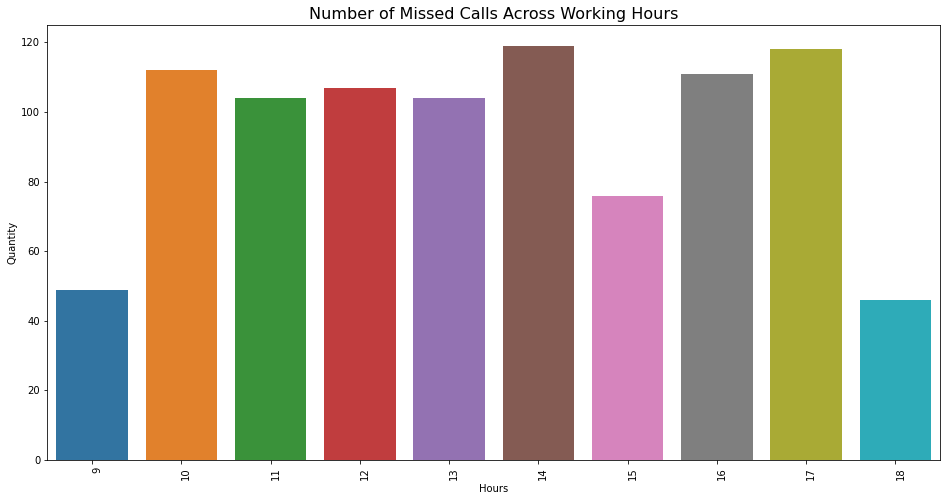

In [30]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='time_hour', y='counts', data = missed_calls_hours)
plt.title('Number of Missed Calls Across Working Hours',size=16)
plt.ylabel('Quantity')
plt.xlabel('Hours')
plt.xticks(rotation=90,ha='left')   
plt.show()

Only the first and last working hours significantly differ from the rest. Consequently, in order to decrease the proportion of missed calls, we should consider gathering more data on missed calls and potentially temporarily increasing the number of teammates.

Now let's have a look at resolution rate.

In [31]:
df_resolved = df_tickets.groupby('support_person')['resolved'].value_counts(normalize=True).reset_index(name='percentage')
df_resolved

,support_person,resolved,percentage
0,Becky,1,0.732171
1,Becky,0,0.267829
2,Dan,1,0.744076
3,Dan,0,0.255924
4,Diane,1,0.714060
5,Diane,0,0.285940
6,Greg,1,0.729167
7,Greg,0,0.270833
8,Jim,1,0.728228
9,Jim,0,0.271772


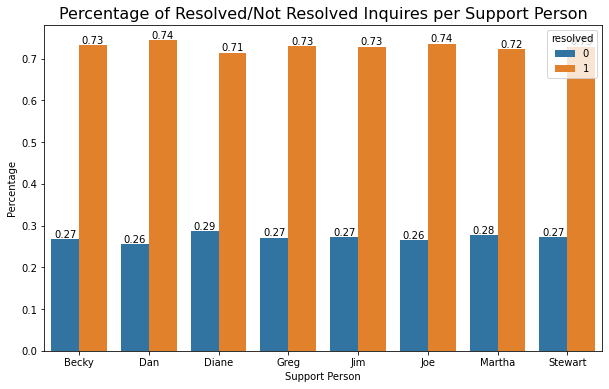

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='support_person', y='percentage', hue='resolved', data=df_resolved)
plt.title('Percentage of Resolved/Not Resolved Inquires per Support Person',size=16)
plt.ylabel('Percentage')
plt.xlabel('Support Person')

for i in ax.containers:
    ax.bar_label(i, labels=[format(round(value, 2), ',') for value in i.datavalues])
    
plt.show()

We have a cohesive team with no leaders or outsiders, and the resolution rate for each team member fluctuates around 71-74%. It is likely that the key to increasing the resolution rate lies in organizational factors rather than the incompetence of employees. Nonetheless, it would be beneficial to assess the team's knowledge on the product and consider providing additional training sessions.

In [33]:
df_tickets['support_person'].value_counts()

Jim        666
Martha     638
Diane      633
Dan        633
Becky      631
Greg       624
Joe        593
Stewart    582
Name: support_person, dtype: int64

Number of recieved calls insignificantly differs from employee to employee.

Suggest to check the distribution of all calls across hours and days

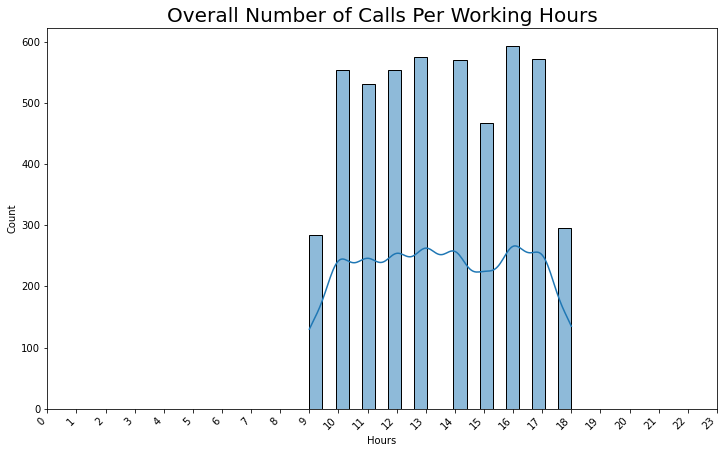

In [108]:
plt.figure(figsize=(12,7))
sns.histplot(df_tickets['time_hour'],bins = 20, kde = True)
plt.xticks(range(24), rotation=45,ha='right')
plt.title('Overall Number of Calls Per Working Hours',size = 20)
plt.xlabel('Hours')
plt.show()

In [35]:
df_tickets['weekday'] = df_tickets['date'].dt.strftime("%A")

In [36]:
df_tickets['weekday'].value_counts()

Monday       770
Saturday     768
Sunday       716
Thursday     712
Friday       680
Wednesday    679
Tuesday      675
Name: weekday, dtype: int64

Our call center operates from 9:00 to 18:00, from Monday to Saturday. The first and last hours of operation experience the least demand, while the busiest hour is typically at 16:00, although the difference is only slight compared to the rest of the working hours.

Now checking the distribution for each employee

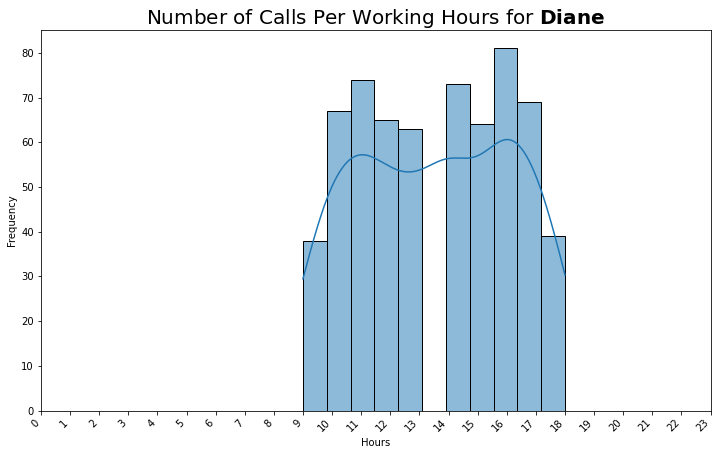

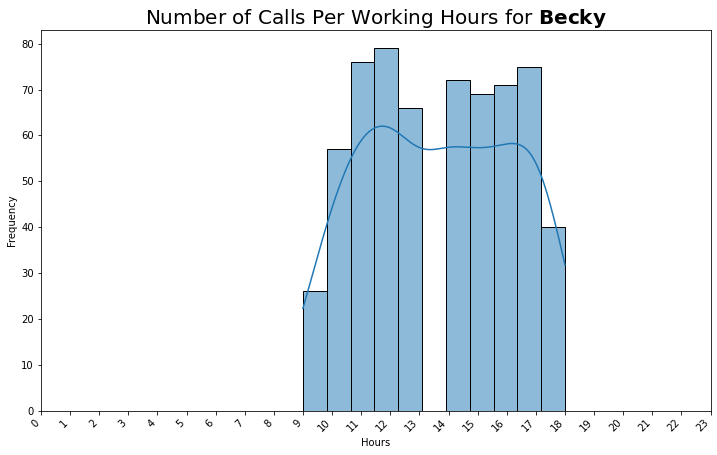

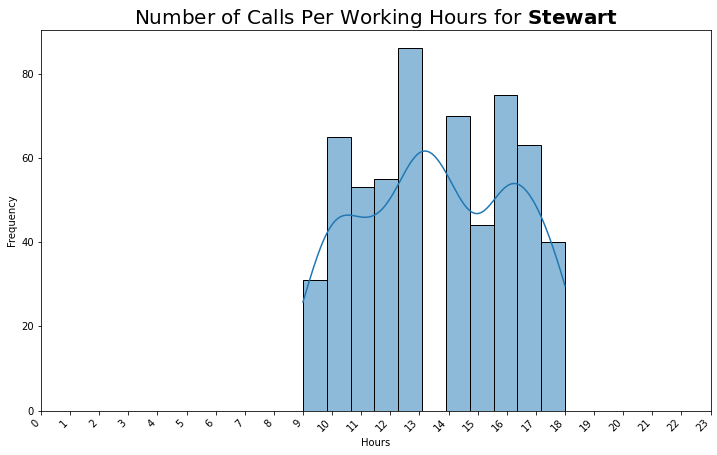

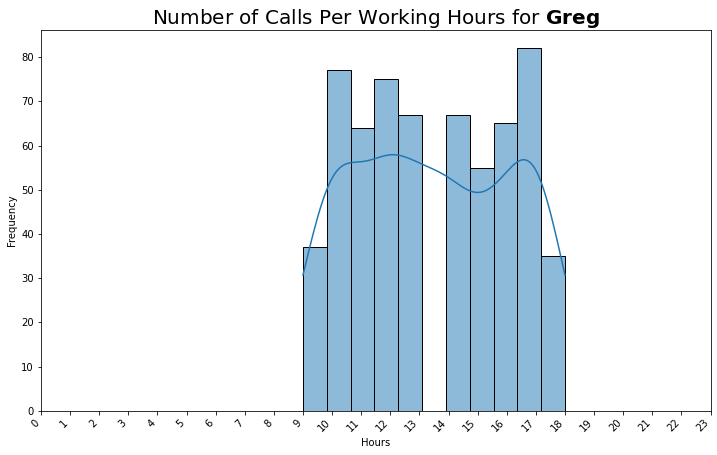

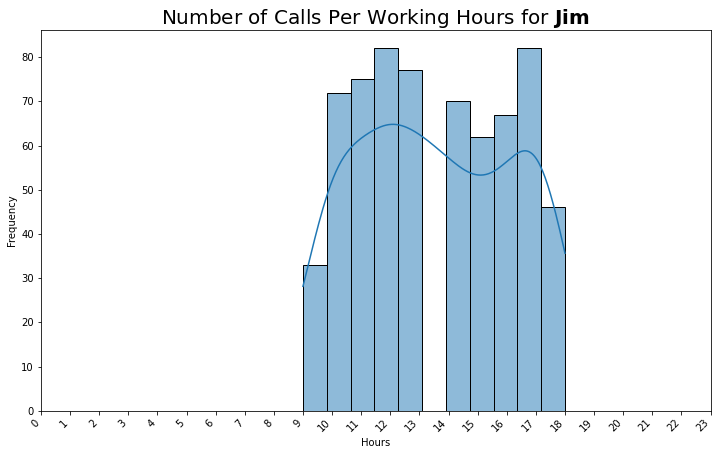

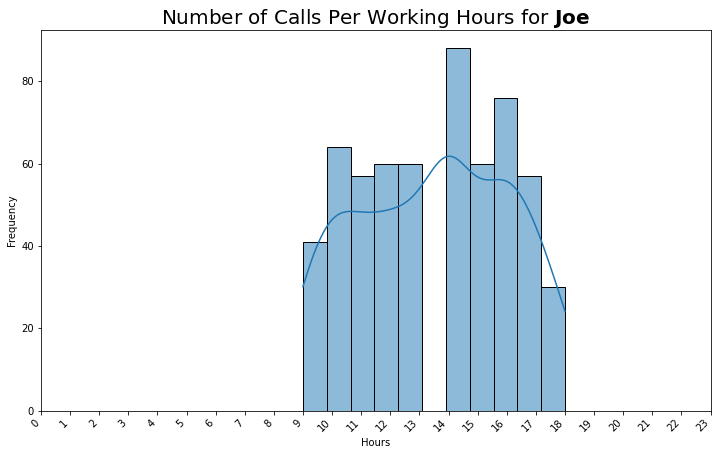

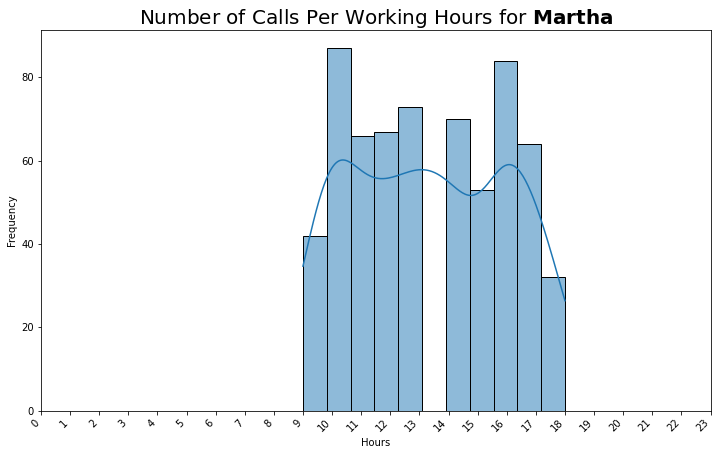

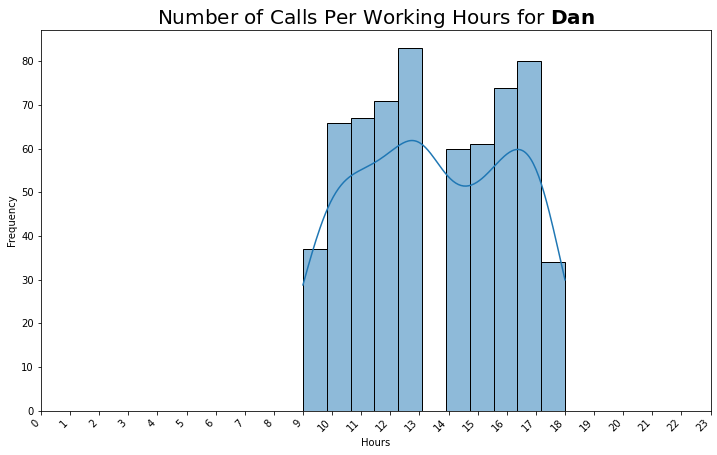

In [117]:
for person in support_employees:
    plt.figure(figsize=(12, 7))
    sns.histplot(df_tickets.query('support_person == @person')['time_hour'],kde=True)
    plt.title(r'Number of Calls Per Working Hours for $\bf{'+person+'}$', size=20)
    plt.xticks(range(24), rotation=45,ha='right')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.show()

No shifts in employee working hours have been discovered. Everyone works from 9:00 till 18:00, with each individual having a different busiest hour. However, the main pattern remains consistent with the overall distribution

Now days

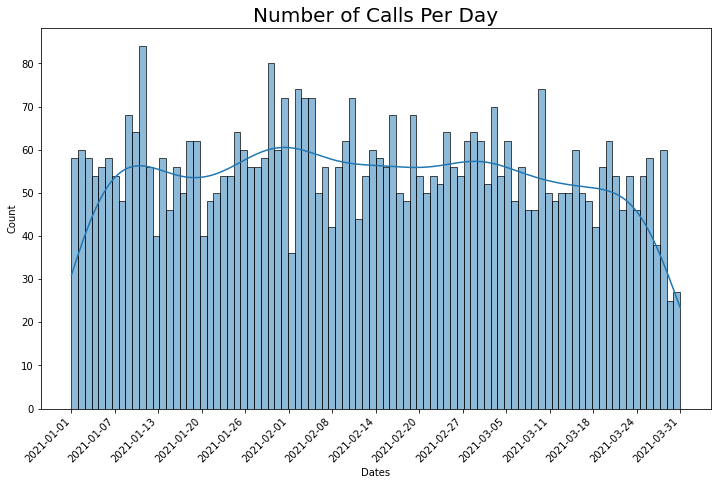

In [39]:
plt.figure(figsize=(12,7))
sns.histplot(df_tickets['date'],bins=90, kde = True)

min_date = df_tickets['date'].min()
max_date = df_tickets['date'].max()
date_ticks = pd.date_range(min_date, max_date, periods=15)

plt.xticks(date_ticks,rotation=45,ha='right')
plt.title('Number of Calls Per Day',size = 20)
plt.xlabel('Dates')
plt.show()

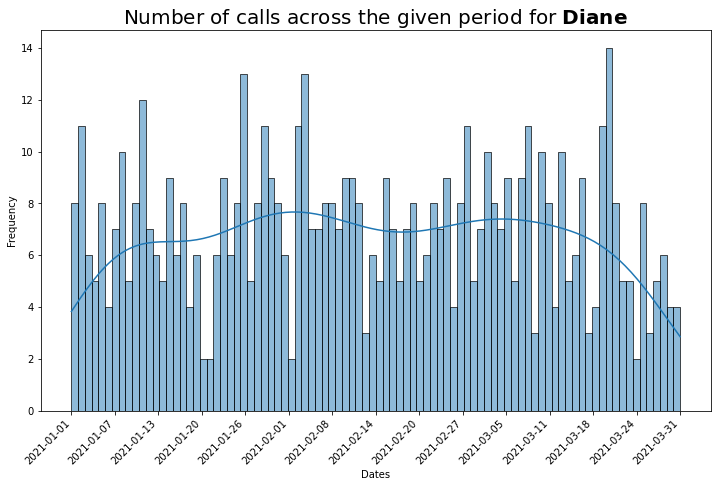

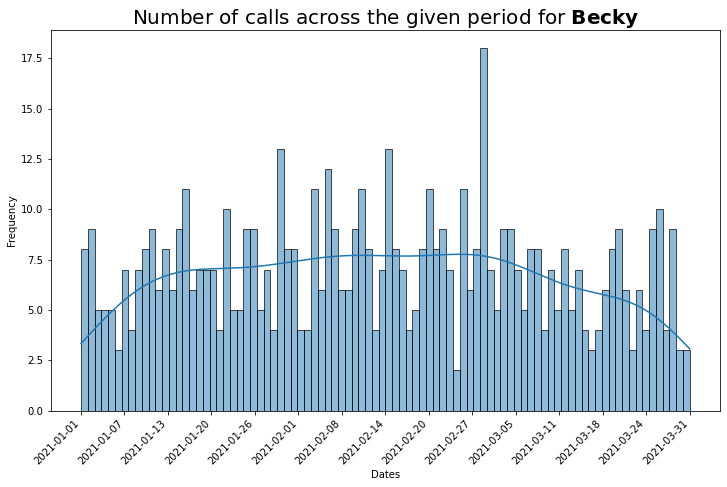

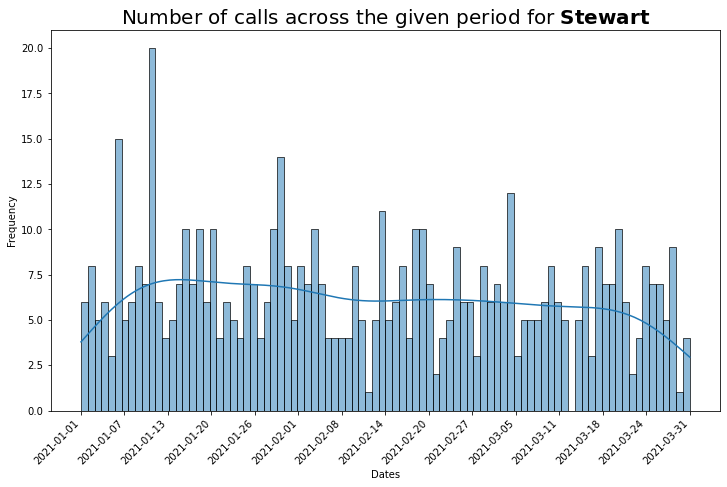

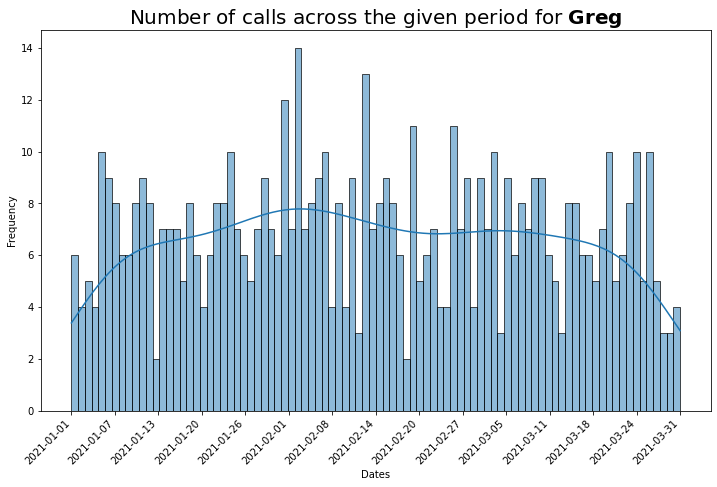

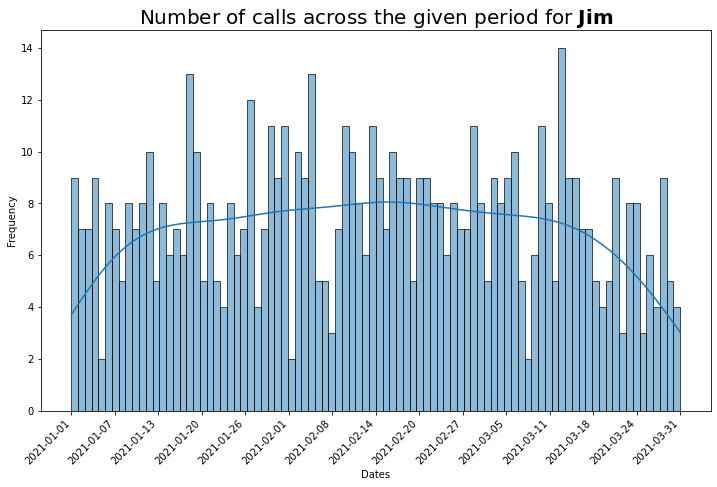

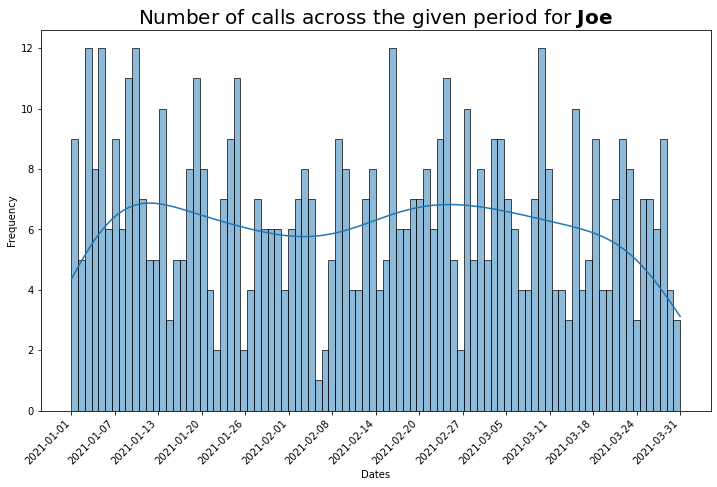

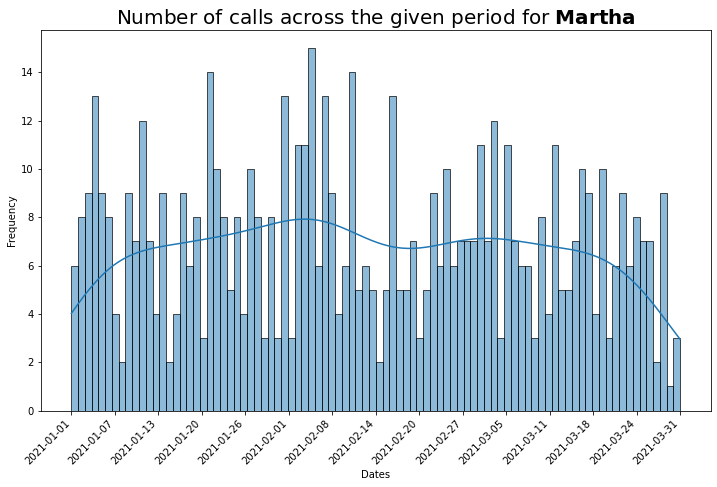

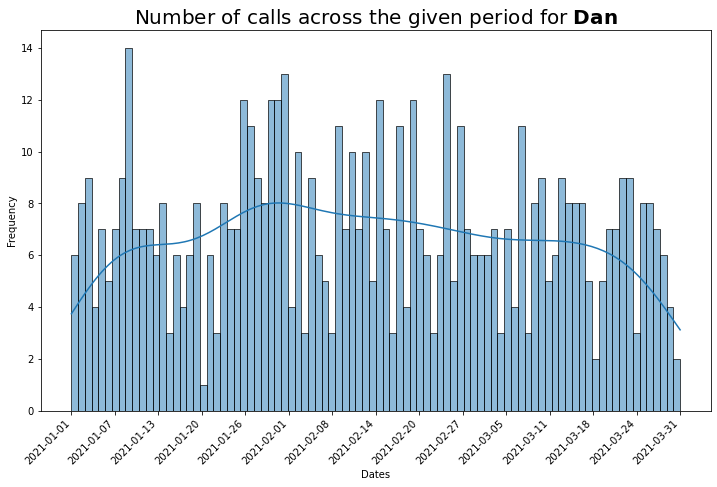

In [40]:
for person in support_employees:
    plt.figure(figsize=(12, 7))
    sns.histplot(df_tickets.query('support_person == @person')['date'],bins=90,kde=True)
    plt.title(r'Number of calls across the given period for $\bf{'+person+'}$', size=20)
    plt.xticks(date_ticks,rotation=45,ha='right')
    plt.xlabel('Dates')
    plt.ylabel('Frequency')
    plt.show()

Despite each employee having a relatively equal total number of calls, their busiest days differ. The highest number of calls received on the busiest day is 20 for Stewart, followed by Becky with 17 calls. The remaining employees have 14 calls on their busiest days. However, some employees may have only received one call throughout the least busy days. 

To determine if there is specialization among our employees with regard to specific topics, let's examine the distribution of call topics assigned to each employee

In [41]:
person_topic_stat = df_tickets.groupby(['support_person','topic'])['call_id'].count().reset_index()
person_topic_stat.columns = ['support_person', 'topic', 'count']
person_topic_stat

,support_person,topic,count
0,Becky,Admin Support,121
1,Becky,Contract related,114
2,Becky,Payment related,138
3,Becky,Streaming,137
4,Becky,Technical Support,121
5,Dan,Admin Support,108
6,Dan,Contract related,123
7,Dan,Payment related,130
8,Dan,Streaming,132
9,Dan,Technical Support,140


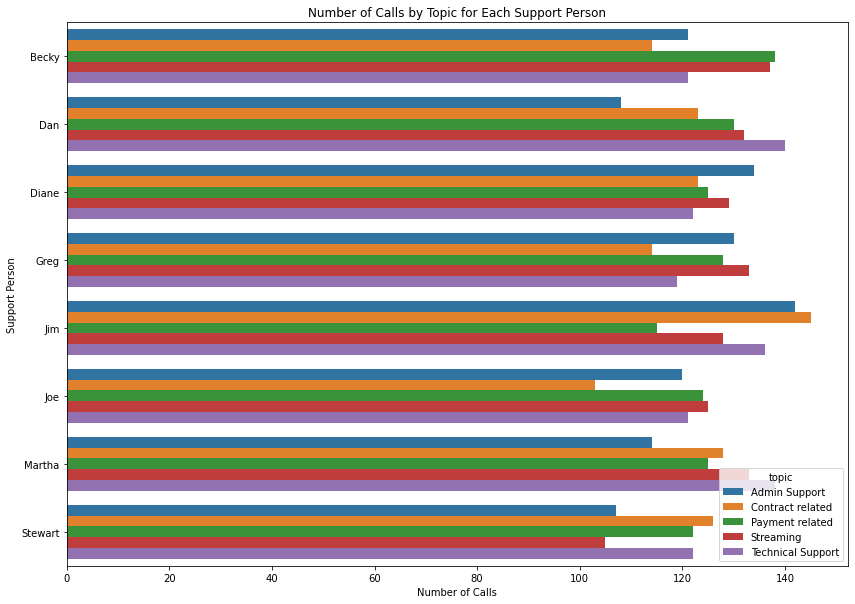

In [42]:
plt.figure(figsize=(14,10))
sns.barplot(x='count', y='support_person', hue='topic', data=person_topic_stat)
plt.xlabel('Number of Calls')
plt.ylabel('Support Person')
plt.title('Number of Calls by Topic for Each Support Person')
plt.show()

So, it appears that each of our employees is ready to answer questions and inquires regarding any topic.

Now we suggest check our customers satisfaction rating. Starting with average rating per day.

In [43]:
ratings_per_day = (df_tickets.groupby('date')['satisfaction_rating']
                 .mean()
                 .reset_index(name='average_rating')
                 .sort_values(by='date'))
ratings_per_day.head()

,date,average_rating
0,2021-01-01,3.500000
1,2021-01-02,3.208333
2,2021-01-03,3.468085
3,2021-01-04,3.454545
4,2021-01-05,3.489796


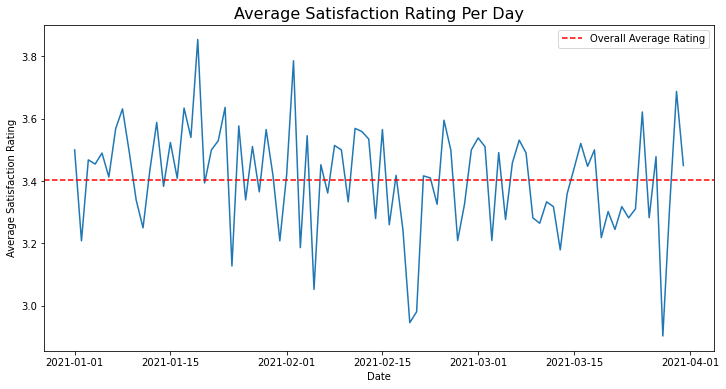

In [44]:
overall_avg_rating = df_tickets['satisfaction_rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='average_rating', data=ratings_per_day)
plt.axhline(overall_avg_rating, color='red', linestyle='--', label='Overall Average Rating')
plt.title('Average Satisfaction Rating Per Day', size=16)
plt.xlabel('Date')
plt.ylabel('Average Satisfaction Rating')
plt.legend()
plt.show()

In [45]:
ratings_per_day.describe()

,average_rating
count,90.000000
mean,3.407934
std,0.168760
min,2.903226
25%,3.304522
50%,3.427918
75%,3.519196
max,3.854167


Despite notable fluctuations on the chart, the changes in the average rating are not dramatic and predominantly range between 3.6 and 3.2. The overall average rating is 3.4. Standard deviation with value of 0.16 as well highlights insignificance of fluctuation.  Additionally, there is a slight decrease in the average rating over time, with the curve tending to fall below the overall average rating as we approach the end of the given period

Now per working hour

In [46]:
ratings_per_hour = (df_tickets.groupby('time_hour')['satisfaction_rating']
                    .mean()
                    .reset_index(name='average_rating')
                    .sort_values(by='time_hour'))
ratings_per_hour

,time_hour,average_rating
0,9,3.588983
1,10,3.469526
2,11,3.478972
3,12,3.371365
4,13,3.407643
5,14,3.241685
6,15,3.349490
7,16,3.410788
8,17,3.403084
9,18,3.396000


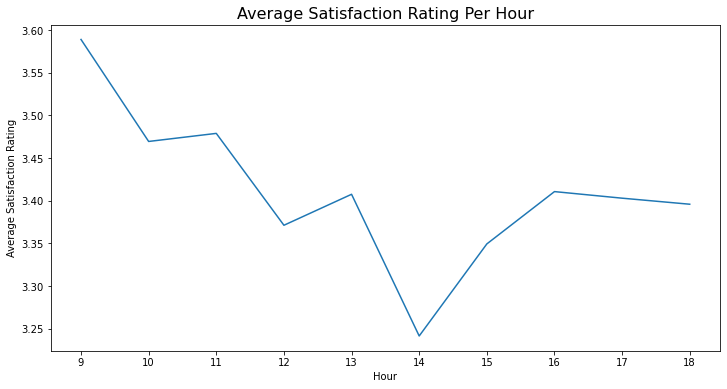

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(x='time_hour', y='average_rating', data=ratings_per_hour)
plt.title('Average Satisfaction Rating Per Hour', size = 16)
plt.xlabel('Hour')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(ratings_per_hour['time_hour'])
plt.show()

As we see the lowest satisfaction at 14:00, we can guess that users might be annoyed due decreasing availibilty of employees while the lunch break.

In [48]:
df_tickets.groupby('topic')['satisfaction_rating'].mean().sort_values(ascending=False)

topic
Admin Support        3.426415
Technical Support    3.414907
Streaming            3.402597
Payment related      3.396088
Contract related     3.377693
Name: satisfaction_rating, dtype: float64

Average satisfaction per topic is even as well, no outperformers and outsiders

In [49]:
resolved_per_topic = df_tickets.groupby(['topic','resolved'])['call_id'].count()
resolved_per_topic_share = resolved_per_topic / resolved_per_topic.groupby('topic').sum()*100
resolved_per_topic_share

topic              resolved
Admin Support      0           25.922131
                   1           74.077869
Contract related   0           27.356557
                   1           72.643443
Payment related    0           27.606753
                   1           72.393247
Streaming          0           26.712329
                   1           73.287671
Technical Support  0           27.772326
                   1           72.227674
Name: call_id, dtype: float64

The same for resolution rate per topic.

Now let's dive into one of the most thrilling aspects - satisfaction ratings per employee.

In [50]:
rating_per_person = (df_tickets.groupby('support_person')['satisfaction_rating']
                     .mean()
                     .reset_index(name='average_rating')
                     .sort_values(by='average_rating'))
rating_per_person

,support_person,average_rating
5,Joe,3.330579
0,Becky,3.371373
4,Jim,3.393657
7,Stewart,3.400419
3,Greg,3.404382
2,Diane,3.405190
1,Dan,3.447419
6,Martha,3.470817


In [119]:
df_tickets['topic'].value_counts()

Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: topic, dtype: int64

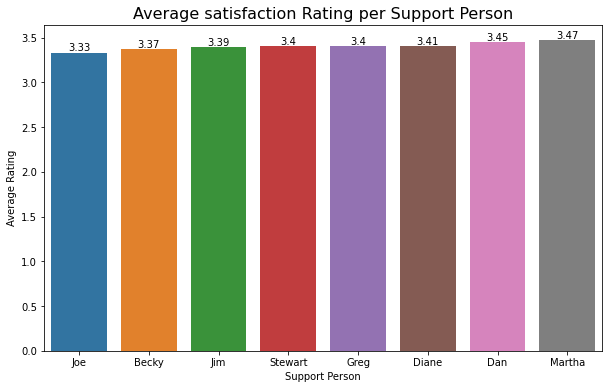

In [51]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='support_person', y='average_rating', data = rating_per_person)
plt.title('Average satisfaction Rating per Support Person',size=16)
plt.ylabel('Average Rating')
plt.xlabel('Support Person')

for i in ax.containers:
    ax.bar_label(i, labels=[format(round(value, 2), ',') for value in i.datavalues])
    
plt.show()

In [52]:
df_tickets.groupby('support_person')['satisfaction_rating'].median().sort_values(ascending=False)


support_person
Becky      4.0
Martha     4.0
Stewart    4.0
Jim        3.5
Dan        3.0
Diane      3.0
Greg       3.0
Joe        3.0
Name: satisfaction_rating, dtype: float64

Once again, we observe that our data is remarkably consistent across various aspects. This is also true for the satisfaction ratings per employee, as there is minimal difference between the mean and median ratings across employees. None of the employees have an average rating below 3.33, while Martha, the leader, has the highest average rating of 3.47.

Now, let's assess the stability of our employees by examining the distribution of ratings. Based on the results of previous steps, we do not expect to see a rating of 3.4 due to a combination of many 5's and 2's. Instead, we anticipate that the majority of ratings will fall within the range of 3 and 4

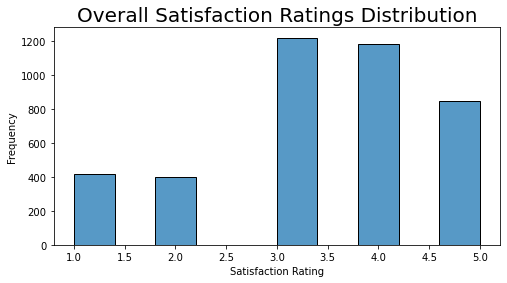

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tickets['satisfaction_rating'],bins=10)
plt.title('Overall Satisfaction Ratings Distribution',size=20)
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

In [54]:
support_employees = df_tickets['support_person'].unique()

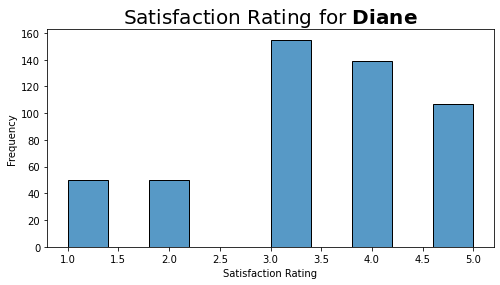

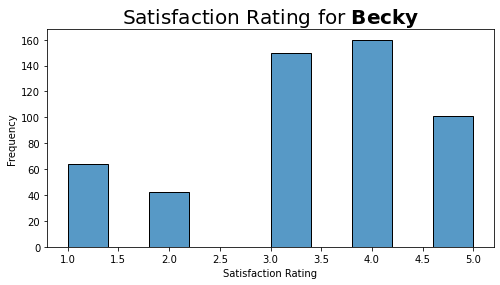

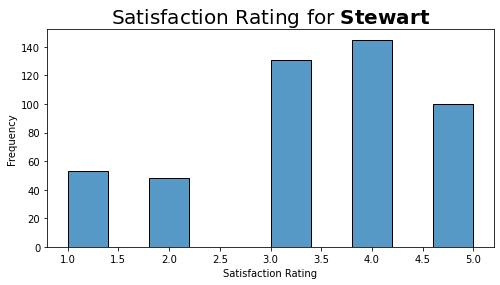

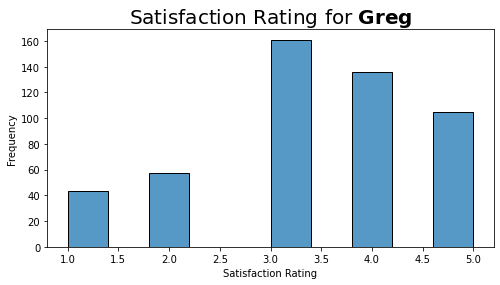

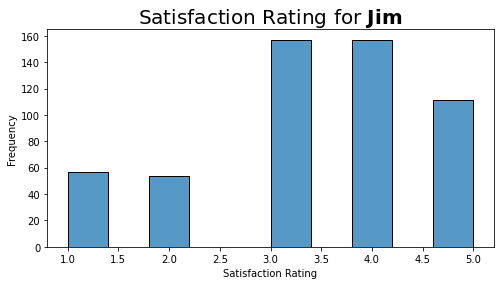

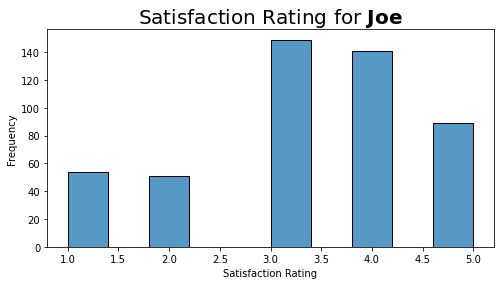

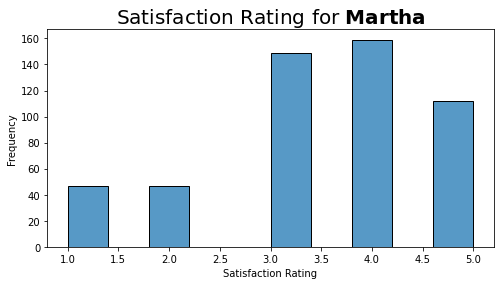

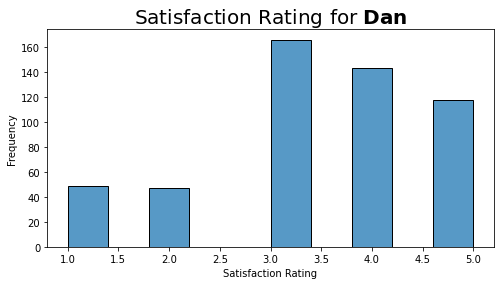

In [55]:
for person in support_employees:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_tickets.query('support_person == @person')['satisfaction_rating'],bins=10)
    plt.title(r'Satisfaction Rating for $\bf{'+person+'}$', size=20)
    plt.xlabel('Satisfaction Rating')
    plt.ylabel('Frequency')
    plt.show()

And as we predicted, the occurrence of 5's is relatively infrequent, while ratings of 1 and 2 are the least common. This results in 3's and 4's being the most frequently given ratings. The pattern is consistent for each employee, with slight variations between the distribution of 3's and 4's, and occasionally a larger proportion of 1's

In [56]:
low_satisfaction = df_tickets.query('satisfaction_rating<=2')
high_satisfaction = df_tickets.query('satisfaction_rating>=3')

In [57]:
low_satisfaction['topic'].value_counts()

Payment related      174
Contract related     168
Streaming            165
Technical Support    158
Admin Support        148
Name: topic, dtype: int64

In [58]:
high_satisfaction['topic'].value_counts()

Streaming            682
Technical Support    647
Admin Support        647
Payment related      644
Contract related     621
Name: topic, dtype: int64

The topic of phone calls does not appear to significantly influence the satisfaction ratings provided by users. Regardless of the topic, there is a relatively consistent distribution of both high and low satisfaction ratings among the calls. 

In [59]:
columns = ['answer_speed','answered','resolved','talk_duration_sec']

for col in columns:
    mean_high = high_satisfaction[col].mean()
    mean_low = low_satisfaction[col].mean()
    median_high = high_satisfaction[col].median()
    median_low = low_satisfaction[col].median()

    print(f"Mean value for {col} in df high_satisfaction: {mean_high}")
    print(f"Mean value for {col} in df low_satisfaction: {mean_low}")
    print(f"Median value for {col} in df high_satisfaction: {median_high}")
    print(f"Median value for {col} in df high_satisfaction: {median_low}")
    print('')

Mean value for answer_speed in df high_satisfaction: 67.51897562480715
Mean value for answer_speed in df low_satisfaction: 67.52767527675277
Median value for answer_speed in df high_satisfaction: 68.0
Median value for answer_speed in df high_satisfaction: 67.0

Mean value for answered in df high_satisfaction: 1.0
Mean value for answered in df low_satisfaction: 1.0
Median value for answered in df high_satisfaction: 1.0
Median value for answered in df high_satisfaction: 1.0

Mean value for resolved in df high_satisfaction: 0.8997223079296514
Mean value for resolved in df low_satisfaction: 0.897908979089791
Median value for resolved in df high_satisfaction: 1.0
Median value for resolved in df high_satisfaction: 1.0

Mean value for talk_duration_sec in df high_satisfaction: 225.02684356680038
Mean value for talk_duration_sec in df low_satisfaction: 224.5079950799508
Median value for talk_duration_sec in df high_satisfaction: 227.0
Median value for talk_duration_sec in df high_satisfaction:

The same conclusion for factors above. Apparently the answer is the only influencing factor explaining high and low satisfaction rating.

In [77]:
df_tickets.query('answered ==1 & resolved==0')['satisfaction_rating'].value_counts()

4.0    126
3.0    112
5.0     87
1.0     42
2.0     41
Name: satisfaction_rating, dtype: int64

Even unresolved inquiries (among answered calls) were not necessarily a reason for customers to give a low satisfaction rating. Most of these calls received ratings of 4 and 3, and surprisingly, a rating of 5 was more common than ratings of 1 or 2.

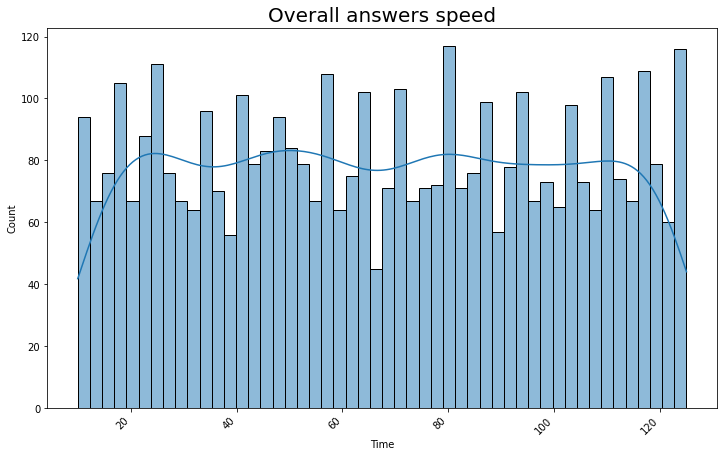

In [60]:
plt.figure(figsize=(12,7))
sns.histplot(df_tickets['answer_speed'],bins=50, kde = True)
plt.xticks(rotation=45,ha='right')
plt.title('Overall answers speed',size = 20)
plt.xlabel('Time')
plt.show()


Average answer speed for Diane is: 66.27



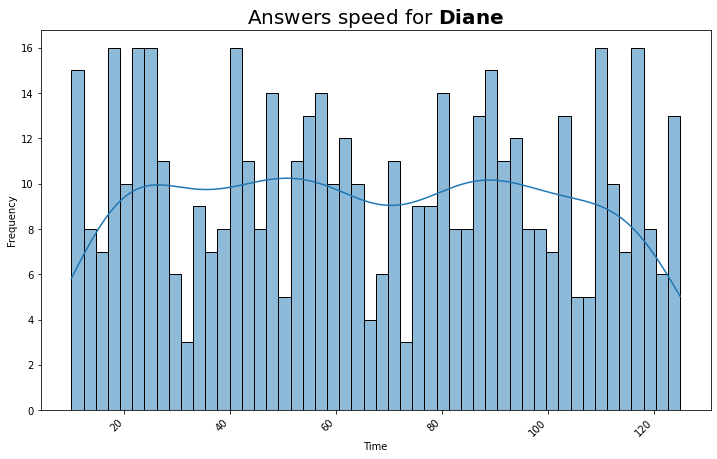

----------------------------------------

Average answer speed for Becky is: 65.33



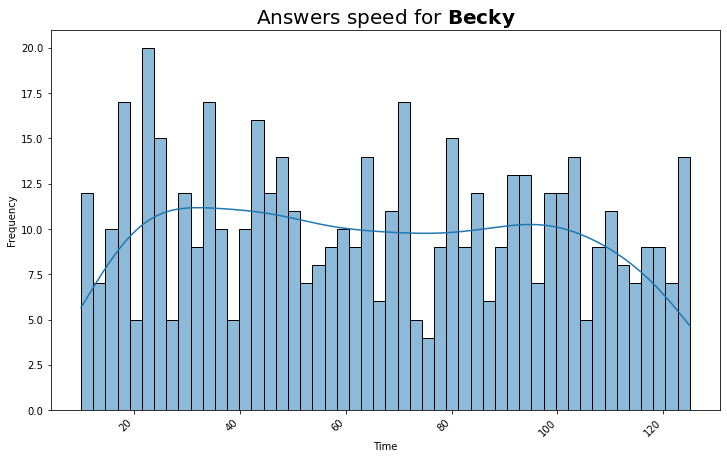

----------------------------------------

Average answer speed for Stewart is: 66.18



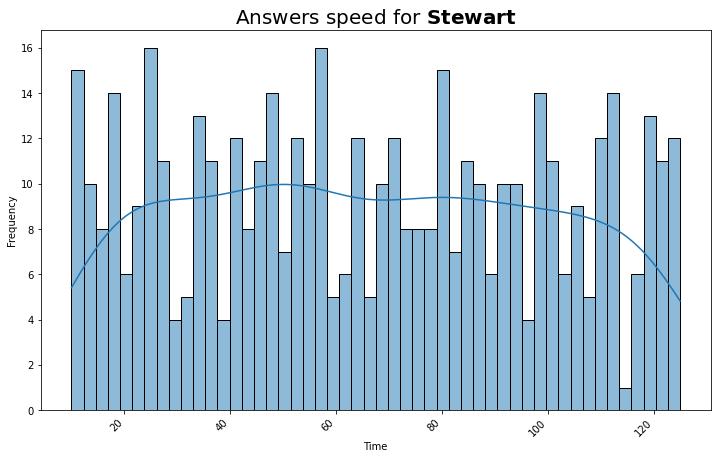

----------------------------------------

Average answer speed for Greg is: 68.44



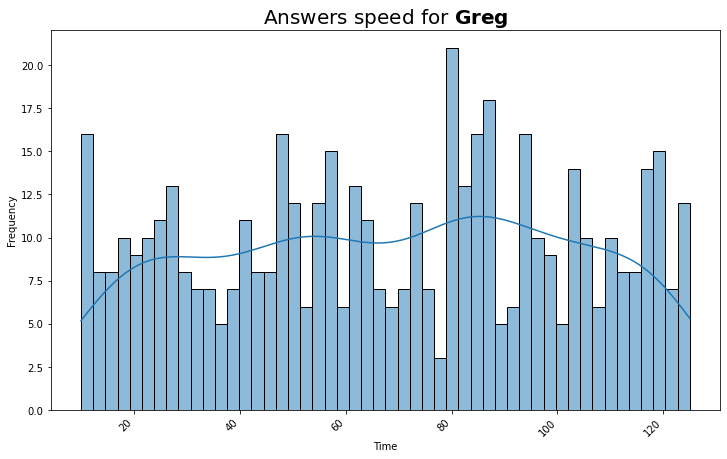

----------------------------------------

Average answer speed for Jim is: 66.34



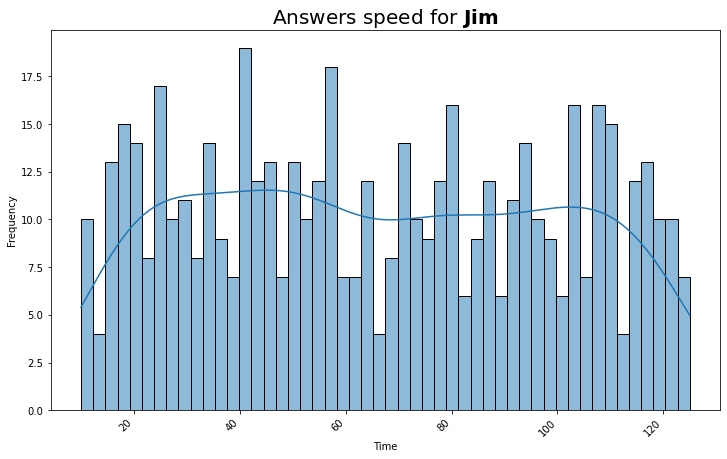

----------------------------------------

Average answer speed for Joe is: 70.99



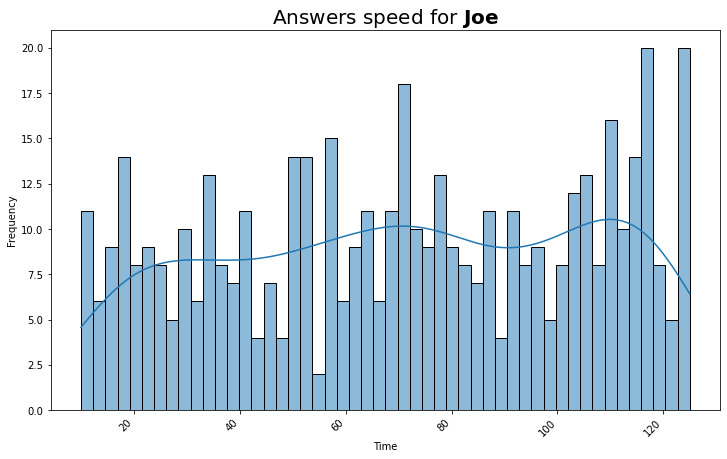

----------------------------------------

Average answer speed for Martha is: 69.49



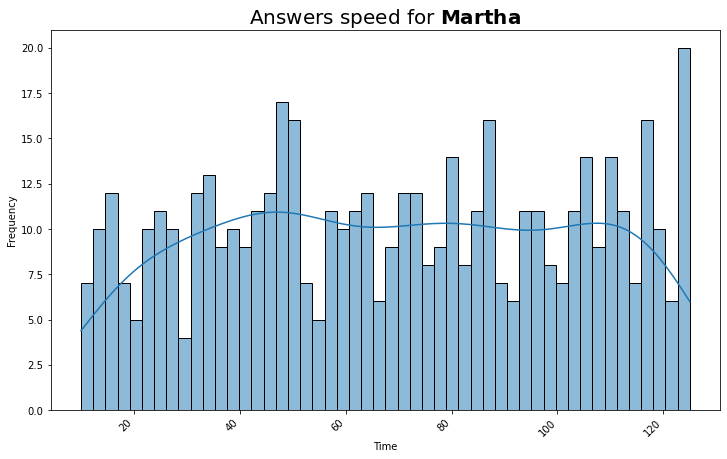

----------------------------------------

Average answer speed for Dan is: 67.28



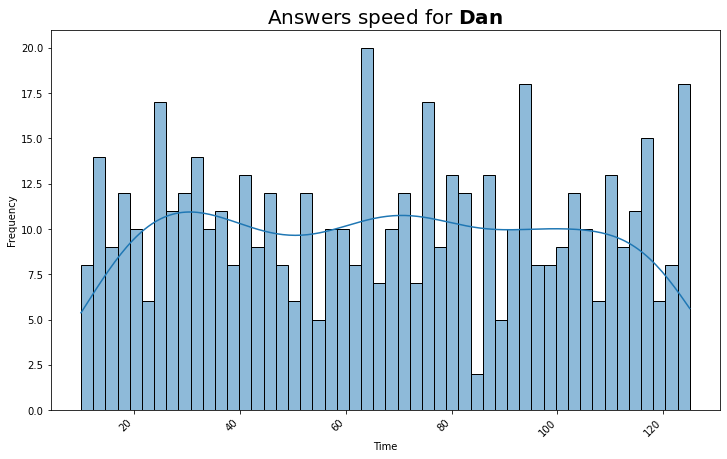

----------------------------------------


In [61]:
for person in support_employees:
    print('')
    print(f'Average answer speed for {person} is: {round(df_tickets.query("support_person == @person")["answer_speed"].mean(),2)}')
    print('')
    plt.figure(figsize=(12, 7))
    sns.histplot(df_tickets.query('support_person == @person')['answer_speed'],bins=50,kde=True)
    plt.title(r'Answers speed for $\bf{'+person+'}$', size=20)
    plt.xticks(rotation=45,ha='right')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    print('--'*20)

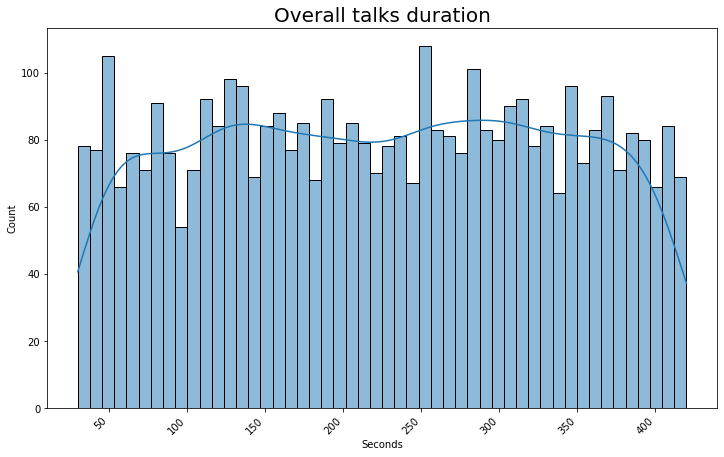

In [62]:
plt.figure(figsize=(12,7))
sns.histplot(df_tickets['talk_duration_sec'],bins=50, kde = True)
plt.xticks(rotation=45,ha='right')
plt.title('Overall talks duration',size = 20)
plt.xlabel('Seconds')
plt.show()


Average talk duration for Diane is: 218.95



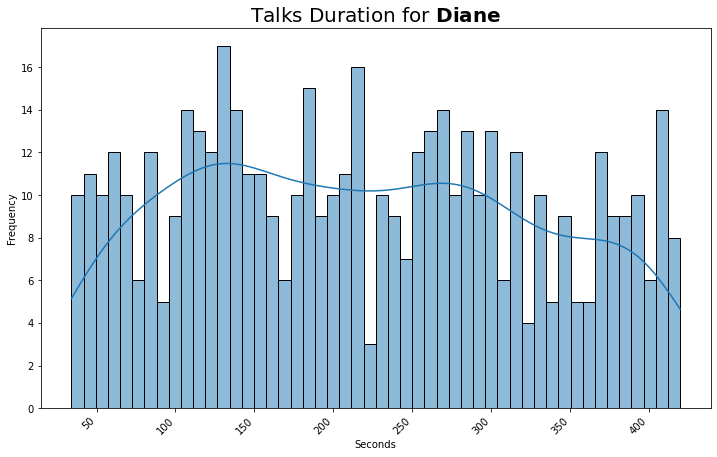

----------------------------------------

Average talk duration for Becky is: 220.01



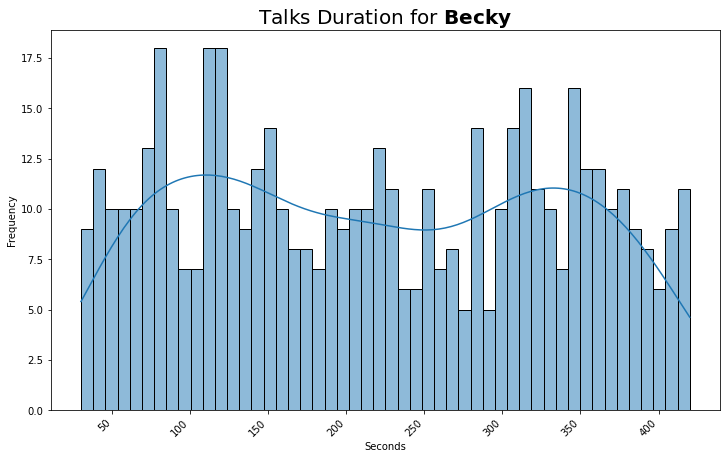

----------------------------------------

Average talk duration for Stewart is: 226.21



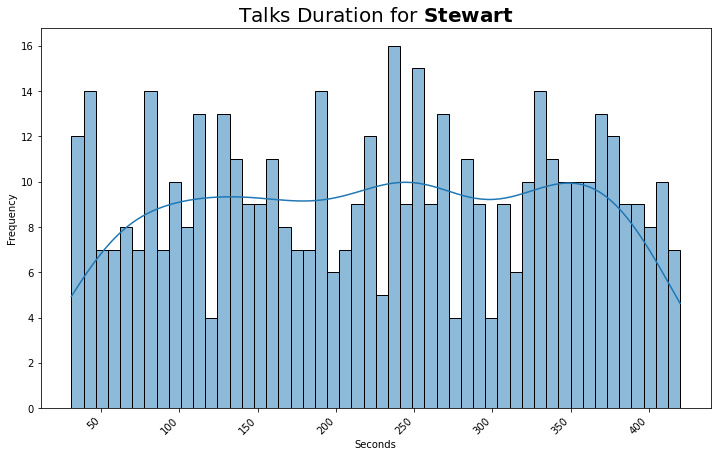

----------------------------------------

Average talk duration for Greg is: 226.8



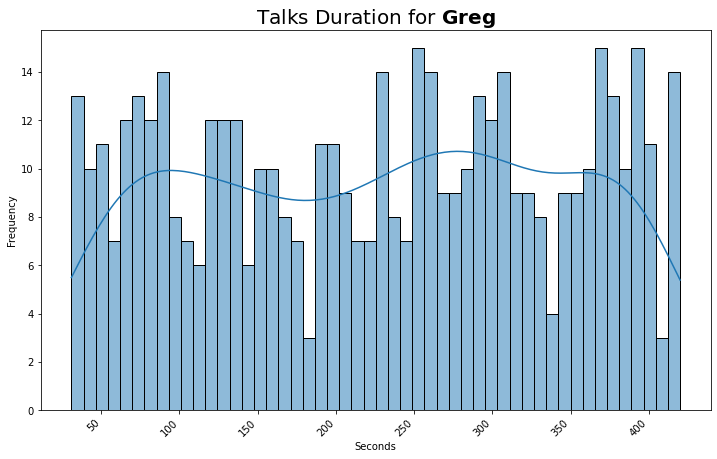

----------------------------------------

Average talk duration for Jim is: 228.11



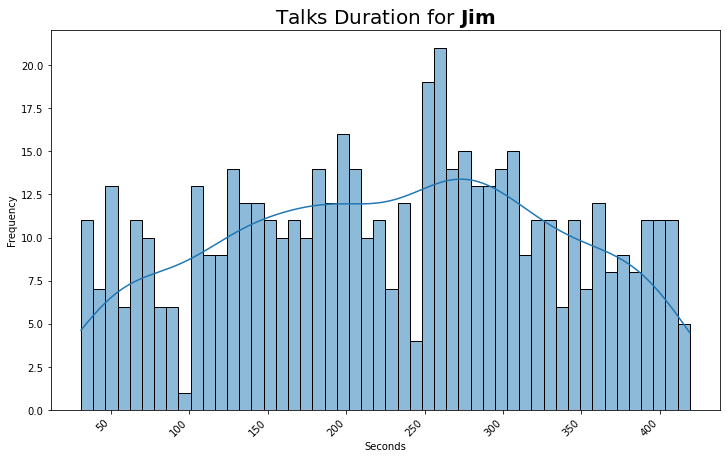

----------------------------------------

Average talk duration for Joe is: 224.1



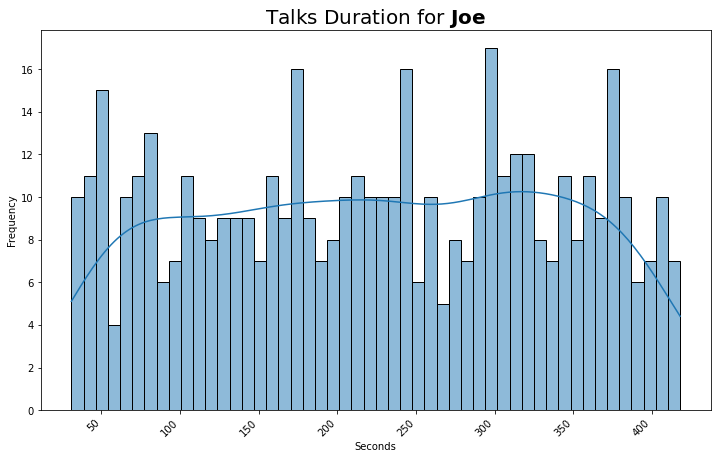

----------------------------------------

Average talk duration for Martha is: 223.73



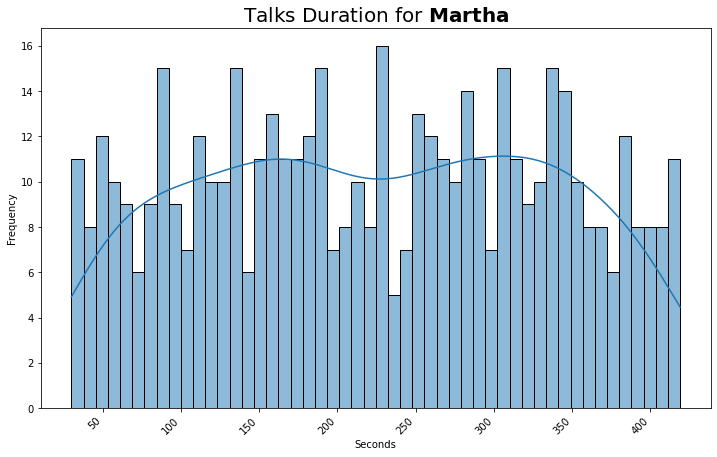

----------------------------------------

Average talk duration for Dan is: 231.19



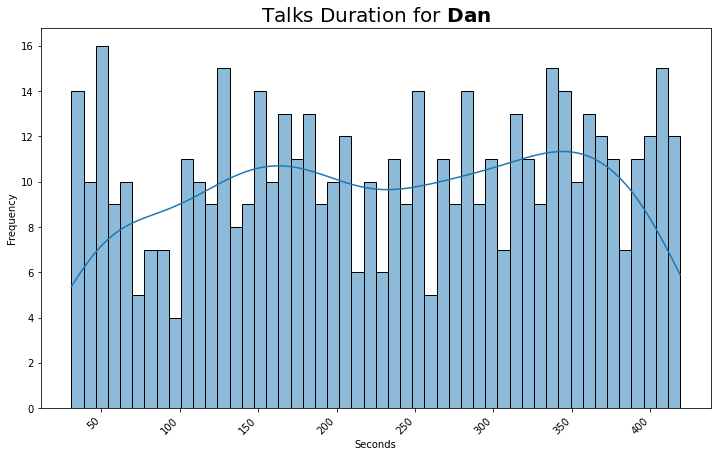

----------------------------------------


In [63]:
for person in support_employees:
    print('')
    print(f'Average talk duration for {person} is: {round(df_tickets.query("support_person == @person")["talk_duration_sec"].mean(),2)}')
    print('')
    plt.figure(figsize=(12, 7))
    sns.histplot(df_tickets.query('support_person == @person')['talk_duration_sec'],bins=50,kde=True)
    plt.title(r'Talks Duration for $\bf{'+person+'}$', size=20)
    plt.xticks(rotation=45,ha='right')
    plt.xlabel('Seconds')
    plt.ylabel('Frequency')
    plt.show()
    print('--'*20)

In [64]:
duration_per_topic_avg = df_tickets.groupby('topic')['talk_duration_sec'].mean().reset_index(name = 'average_duration')
duration_per_topic_avg

,topic,average_duration
0,Admin Support,228.047799
1,Contract related,228.012674
2,Payment related,215.861858
3,Streaming,227.730815
4,Technical Support,225.060870


In [65]:
duration_per_topic_med = df_tickets.groupby('topic')['talk_duration_sec'].median().reset_index(name = 'average_duration')
duration_per_topic_med

,topic,average_duration
0,Admin Support,234.0
1,Contract related,229.0
2,Payment related,209.0
3,Streaming,232.0
4,Technical Support,229.0


In [67]:
mapping_names = {'Jim': '1', 'Martha': '2', 'Diane': '3', 'Dan': '4', 'Becky': '5', 'Greg': '6', 'Joe': '7', 'Stewart': '8'}
df_tickets['encoded_names'] = df_tickets['support_person'].map(mapping_names)
df_tickets['encoded_names'] = df_tickets['encoded_names'].astype(int)


In [70]:
correlation_matrix = df_tickets.corr()
correlation_matrix

,answered,resolved,answer_speed,satisfaction_rating,time_hour,talk_duration_sec,encoded_names
answered,1.000000,0.792689,NaN,NaN,0.007430,NaN,0.013043
resolved,0.792689,1.000000,0.006968,-0.007002,-0.008958,0.006799,0.006106
answer_speed,NaN,0.006968,1.000000,0.000952,-0.003453,-0.002898,0.008933
satisfaction_rating,NaN,-0.007002,0.000952,1.000000,-0.032785,0.000143,-0.016200
time_hour,0.007430,-0.008958,-0.003453,-0.032785,1.000000,0.007564,0.009289
talk_duration_sec,NaN,0.006799,-0.002898,0.000143,0.007564,1.000000,-0.000299
encoded_names,0.013043,0.006106,0.008933,-0.016200,0.009289,-0.000299,1.000000


# Preparing Data for External

In [87]:
tickets_viz = df_tickets[['call_id', 'support_person', 'date', 'topic',
                          'answered','resolved', 'answer_speed', 'satisfaction_rating',
                          'time_hour', 'talk_duration_sec', 'weekday']]

In [89]:
tickets_viz['answered'] = tickets_viz['answered'].replace({1 : 'Yes', 0 : 'No'})
tickets_viz['resolved'] = tickets_viz['resolved'].replace({1 : 'Yes', 0 : 'No'})

/var/folders/h4/nypjjg6j0z99xyxph5m6ddl80000gn/T/ipykernel_49365/1070932297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickets_viz['answered'] = tickets_viz['answered'].replace({1 : 'Yes', 0 : 'No'})
/var/folders/h4/nypjjg6j0z99xyxph5m6ddl80000gn/T/ipykernel_49365/1070932297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickets_viz['resolved'] = tickets_viz['resolved'].replace({1 : 'Yes', 0 : 'No'})


In [92]:
tickets_viz.to_csv("tickets_viz.csv", index=False)

# Conclusion

Our study, based on an analysis of the call center dataset for a cellular company, has provided us with key insights into the performance of the customer support team. We found no significant correlation between customer satisfaction ratings and call metrics such as resolution rate, call duration, and call date/hour. Similarly, employee ratings are uniformly distributed across the team, indicating a consistent level of performance. Call metrics, both overall and per employee, are stable. Interestingly, unresolved inquiries did not necessarily lead to low satisfaction ratings, as most of these calls still received ratings of 3 or 4.

This leads us to conclude that the factors influencing customer satisfaction during the study period are likely external to call metrics and individual employee performance. These may include customers' individual characteristics, the nature of their issue, their past experiences with us, or the quality of communication from the call center employees.

It's also possible that our current measures aren't capturing the key aspects of customer interactions that impact satisfaction.

Given the importance of service quality, we recommend investing in employee training to improve communication skills and problem-solving abilities. We also suggest investigating the causes of unanswered calls and adjusting workforce strategies during peak times. Dividing employees and scheduling their breaks at different times could address a slight dip in customer satisfaction observed from 13:00 to 14:00, presumably due to decreased availability during this period.

In conclusion, we recommend maintaining and regularly updating knowledge on customer service. To aid in this effort, we have created a dashboard for real-time tracking of customer support performance. Regular analysis of this data can help identify emerging patterns or issues swiftly, enabling prompt and effective action.

Here is the link to the Dashboard:

https://public.tableau.com/views/Data_Jam_Customer_Support/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

! Dashboard is about to be UPDATED, along with presentation ! 